In [1]:
import pandas as pd
import folium
import branca
from folium.plugins import HeatMap
from folium import plugins

# --==Renda média por estado==--
* Os estados estão centralizados pela Latitude e Longitude

In [2]:
renda_por_estado = pd.read_excel('renda_media_por_estado_2023.xlsx')
renda_por_estado.head()

,LATITUDE,LONGITUDE,ESTADO,SIGLA,RENDA MEDIA
0,-11.22,-62.80,Rondônia,RO,1527
1,-8.77,-70.55,Acre,AC,1095
2,-3.07,-61.66,Amazonas,AM,1172
3,1.89,-61.22,Roraima,RR,1339
4,-5.33,-52.29,Pará,PA,1282


In [3]:
#css para a barra de legenda
legenda_mapa = """
{% macro html(this, kwargs) %}

<div style = "position: fixed;
bottom: 30px;
left: 600px;
width: 150px;
height: 30px;
font-size: 14px;
z-index: 9999;
">
</div>

<div style = "position: fixed;
bottom: 50px;
left: 600px;
width: 150px;
height: 30px;
font-size: 14px;
z-index: 9998;
">
<p>Salários</p>
</div>

<div style = "position: fixed;
bottom: 1px;
left: 600px;
width: 150px;
height: 30px;
font-size: 14px;
z-index: 9998;
">
<p>Menor</p>
</div>
<div style = "position: fixed;
bottom: 1px;
left: 715px;
width: 150px;
height: 30px;
font-size: 14px;
z-index: 9998;
">
<p>Maior</p>
</div>

<div style = "position: fixed;
bottom: 30px;
left: 600px;
width: 150px;
height: 30px;
font-size: 14px;
background: linear-gradient(to right, blue, green, yellow, orange, red);
border: solid 1px black;
z-index: 9997;
opacity: 0.7;
">


</div>

{% endmacro %}
"""

legenda = branca.element.MacroElement()
legenda._template = branca.element.Template(legenda_mapa)

In [4]:
mapa = folium.Map(tiles = "cartodbpositron",
                width = '100%', #Largura da tela
                height = '100%', #Altura da tela
                location = [-15.788497, -47.899873], #localidade do Brasil
                zoom_start = 4)

mapa.add_child(legenda)

mapa

In [5]:
informacoes = renda_por_estado[["LATITUDE", "LONGITUDE", "RENDA MEDIA"]].values.tolist()
informacoes

[[-11.22, -62.8, 1527.0],
 [-8.77, -70.55, 1095.0],
 [-3.07, -61.66, 1172.0],
 [1.89, -61.22, 1339.0],
 [-5.33, -52.29, 1282.0],
 [1.41, -51.77, 1520.0],
 [-10.26, -48.25, 1581.0],
 [-2.55, -44.3, 945.0],
 [-8.28, -43.68, 1342.0],
 [-3.71, -38.54, 1166.0],
 [-5.22, -36.52, 1373.0],
 [-7.06, -35.55, 1320.0],
 [-8.28, -35.07, 1113.0],
 [-9.71, -35.73, 1110.0],
 [-10.9, -37.07, 1218.0],
 [-12.96, -38.51, 1139.0],
 [-18.1, -44.38, 1918.0],
 [-19.19, -40.34, 1915.0],
 [-22.84, -43.15, 2367.0],
 [-23.55, -46.64, 2492.0],
 [-24.89, -51.55, 2115.0],
 [-27.33, -49.44, 2269.0],
 [-30.01, -51.22, 2304.0],
 [-20.51, -54.54, 2030.0],
 [-12.64, -55.42, 1991.0],
 [-16.64, -49.31, 2017.0],
 [-15.83, -47.86, 3357.0]]

In [6]:
HeatMap(informacoes, radius = 20).add_to(mapa)
mapa

In [7]:
import plotly as px
import plotly.graph_objects as po
import matplotlib.pyplot as plt

In [8]:
renda_por_estado = renda_por_estado.drop("LATITUDE", axis=1) 
renda_por_estado

,LONGITUDE,ESTADO,SIGLA,RENDA MEDIA
0,-62.80,Rondônia,RO,1527
1,-70.55,Acre,AC,1095
2,-61.66,Amazonas,AM,1172
3,-61.22,Roraima,RR,1339
4,-52.29,Pará,PA,1282
5,-51.77,Amapá,AP,1520
6,-48.25,Tocantins,TO,1581
7,-44.30,Maranhão,MA,945
8,-43.68,Piauí,PI,1342
9,-38.54,Ceará,CE,1166


In [9]:
renda_por_estado = renda_por_estado.drop("LONGITUDE", axis=1) 
renda_por_estado

,ESTADO,SIGLA,RENDA MEDIA
0,Rondônia,RO,1527
1,Acre,AC,1095
2,Amazonas,AM,1172
3,Roraima,RR,1339
4,Pará,PA,1282
5,Amapá,AP,1520
6,Tocantins,TO,1581
7,Maranhão,MA,945
8,Piauí,PI,1342
9,Ceará,CE,1166


In [10]:
renda_por_estado = renda_por_estado.sort_values(by='ESTADO', ascending=True)#para colocar em ordem alfabetica
renda_por_estado

,ESTADO,SIGLA,RENDA MEDIA
1,Acre,AC,1095
13,Alagoas,AL,1110
5,Amapá,AP,1520
2,Amazonas,AM,1172
15,Bahia,BA,1139
9,Ceará,CE,1166
26,Distrito Federal,DF,3357
17,Espírito Santo,ES,1915
25,Goiás,GO,2017
7,Maranhão,MA,945


In [11]:
renda_por_estado.set_index('SIGLA', inplace=True)
renda_por_estado

,ESTADO,RENDA MEDIA
SIGLA,,
AC,Acre,1095
AL,Alagoas,1110
AP,Amapá,1520
AM,Amazonas,1172
BA,Bahia,1139
CE,Ceará,1166
DF,Distrito Federal,3357
ES,Espírito Santo,1915
GO,Goiás,2017


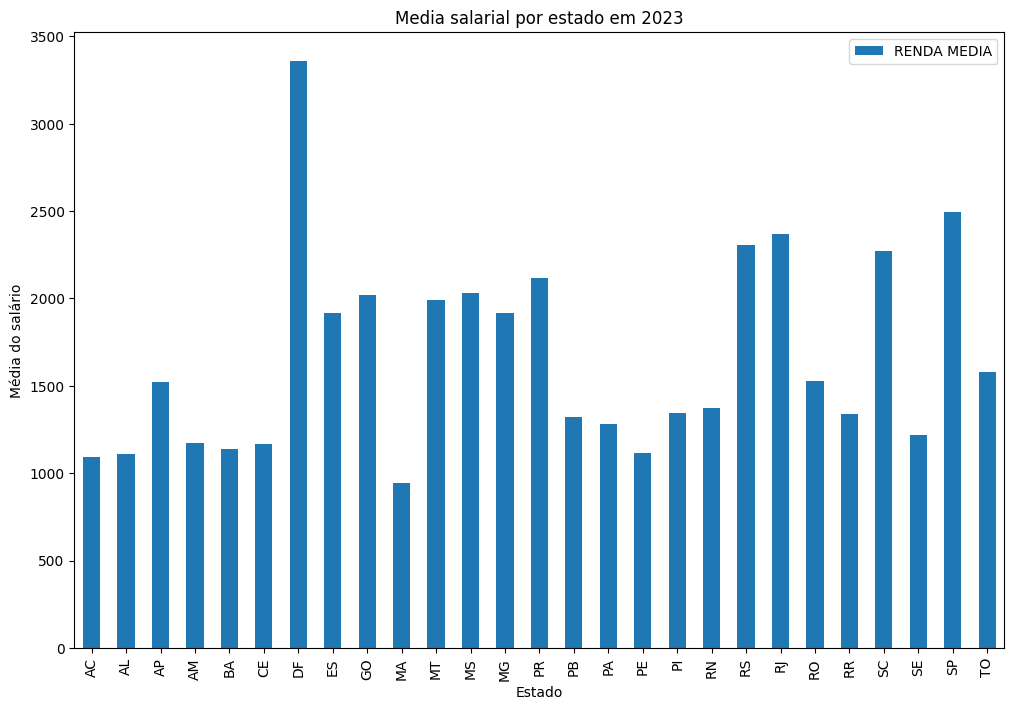

In [12]:
media_salarial_por_estado = renda_por_estado[["RENDA MEDIA"]]
media_salarial_por_estado.plot(kind='bar', figsize=(12, 8))
plt.title('Media salarial por estado em 2023')
plt.xlabel('Estado')
plt.ylabel('Média do salário')
plt.show()

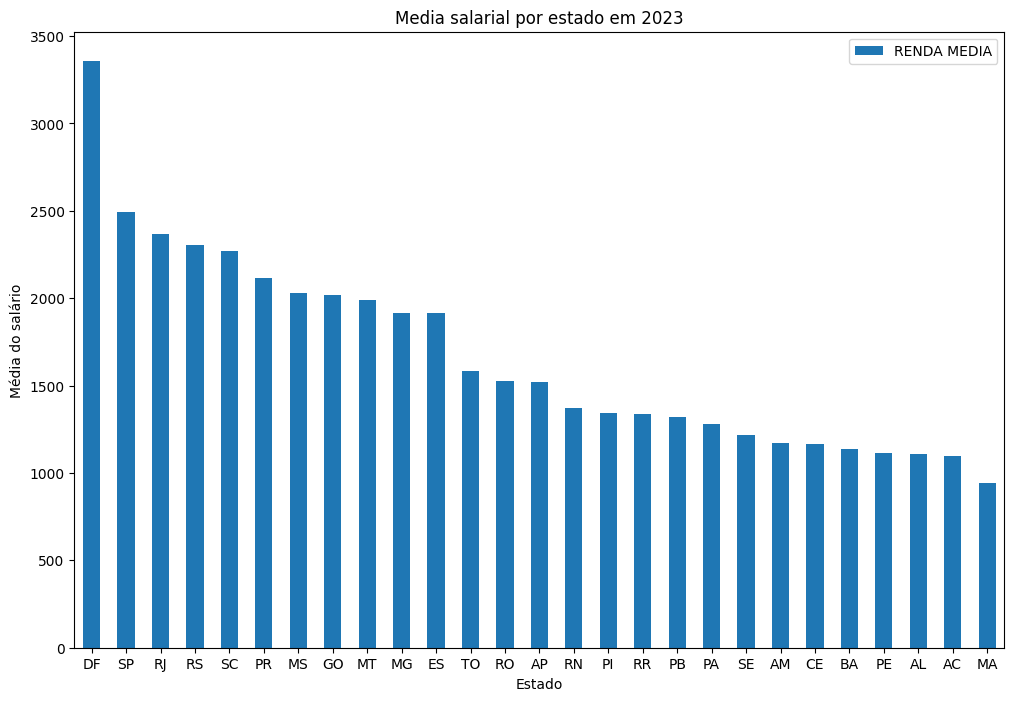

In [13]:
renda_por_estado = renda_por_estado.sort_values(by='RENDA MEDIA', ascending=False)#para colocar em ordem alfabetica
renda_por_estado
media_salarial_por_estado = renda_por_estado[["RENDA MEDIA"]]
media_salarial_por_estado.plot(kind='bar', figsize=(12, 8))
plt.title('Media salarial por estado em 2023')
plt.xlabel('Estado')
plt.ylabel('Média do salário')
plt.xticks(rotation=0)
plt.show()